Python for Data Science Demo
============================

This notebook is designed to show off some of the features of using Python for data science that you'll encounter throughout the year. Although Jupyter Notebooks are not always the right medium for your code, it will also demonstrate some of the features of Jupyter and Jupyter Notebooks that make them useful for data exploration and visualization.

IMPORTANT NOTE: You're not expected to learn how the code below works today---we'll hardly look at the code below. The point of this notebook is just to showcase what CAN be done. We'll learn how to write the code below over the next few weeks and throughout the next quarter. **After getting a look at what's possible in this notebook, we'll start from the very basics in the next notebook.** In the next notebook, we'll cover the basics of Python (types, control structures, functions, modules, etc) and then we'll proceed to learn how to use some of the basic data science packages for Python. This first notebook is just a demo.

You can try running this code yourself. The quickest way to get up and running is to use Google Colaboratory: `https://colab.research.google.com/` You can open this notebook directly in Google Colaboratory by clicking here: [Open in Google Colaboratory.](https://colab.research.google.com/github/jmbejara/finm-python-crash-course/blob/master/python_jupyter_demo.ipynb)

This notebook will start by setting up the environment and then will demonstrate some examples from NumPy, SciPy, Pandas, Matplotlib, and StatsModels (with some bonus examples from Seaborn and iPyWidgets.) This collection of packages represent the foundation of what is called the PyData stack (ecosystem):

<div>
<img src="http://chris35wills.github.io/courses/pydata_stack.png" width="1000"/>
</div>



# 1. Set up Environment

We'll first start by discussing the Python interpreter, Anaconda vs Conda, Jupyter, and Google Colaboratory. We'll defer an in-depth discussion until next week, but we'll mention the basics today. Today, we'll run everything in Google Colaboratory. Next week we'll run our code locally in Jupyter. The following week, we'll discuss text editors. In particular, we'll write code in [Visual Studio Code](https://code.visualstudio.com/).

Now, before we start, we need to set up our environment. We need to install the packages that we need (if they aren't installed already) and then we need to load the packages into Python.

In [1]:
## Install required packages, but do automatically only if running within Google Colaboratory
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install plotly==5.9.0
else:
  print("Be sure to install the required packages manually if not in Colab")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 15.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.express as px

sns.set()

# 2. NumPy

NumPy a library designed to add support "for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."

A good beginner tutorial can be found on the official NumPy website here: https://numpy.org/doc/stable/user/absolute_beginners.html

The basic functionality of NumPy is the efficient management of arrays, with syntax as follows:
<div>
<img src="https://numpy.org/doc/stable/_images/np_array.png" width="1000"/>
</div>

In [11]:
a = np.array([1, 2, 3])

In [12]:
a

array([1, 2, 3])

In [13]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [14]:
B = np.array([
    [1, 0], 
    [0, 1]])
B

array([[1, 0],
       [0, 1]])

In [15]:
A @ B

array([[1, 2],
       [3, 4]])


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Matrix_multiplication_qtl1.svg" width="1000"/>
</div>


In [16]:
b = np.array((1,2))
x = np.linalg.solve(A, b)
x

array([0. , 0.5])

In [17]:
A @ x

array([1., 2.])

In [18]:
eigval, eigvec = np.linalg.eig(A)
eigval

array([-0.37228132,  5.37228132])

In [19]:
eigvec

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

# 2. SciPy

SciPy is a library "used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering."

For example, consider calculating the following integral.
$$
\int_0^1 a x^2 + b \, d x
$$

In [20]:
from scipy.integrate import quad
a = 2
b = 1
def integrand(x):
    return a*x**2 + b
I, err = quad(integrand, 0, 1)
I

1.6666666666666667

# 3. Matplotlib

Matplotlib is the most plotting library for Python. Even other plotting libraries build off of Matplotlib as a foundation. Even if you use other plotting libraries, it is important to understand the basics of Matplotlib.

As an example, consider the function
$$
y = x_0 \exp(-x_2 \cdot t) + x_1 \exp(-x_3 \cdot t)
$$

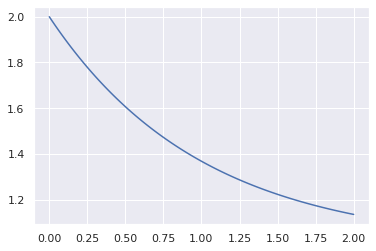

In [21]:
x = np.array([1, 1, 1, 0])
yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
t_grid = np.linspace(0, 2, 100)
y = yfunc(t_grid)
plt.plot(t_grid, y)

Now, let's consider some fancier examples. We'll even use some Seaborn code.

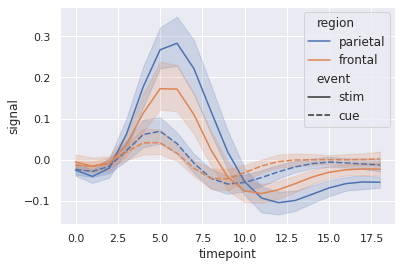

In [22]:
# https://seaborn.pydata.org/examples/errorband_lineplots.html
# Load an example dataset with long-form data
sns.set_theme(style="darkgrid")
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

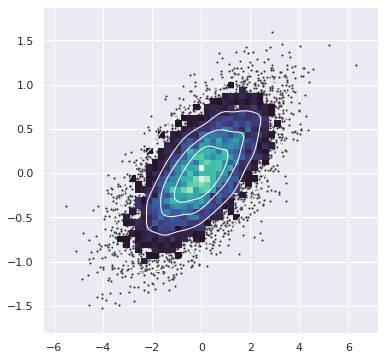

In [23]:
# https://seaborn.pydata.org/examples/layered_bivariate_plot.html
# sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

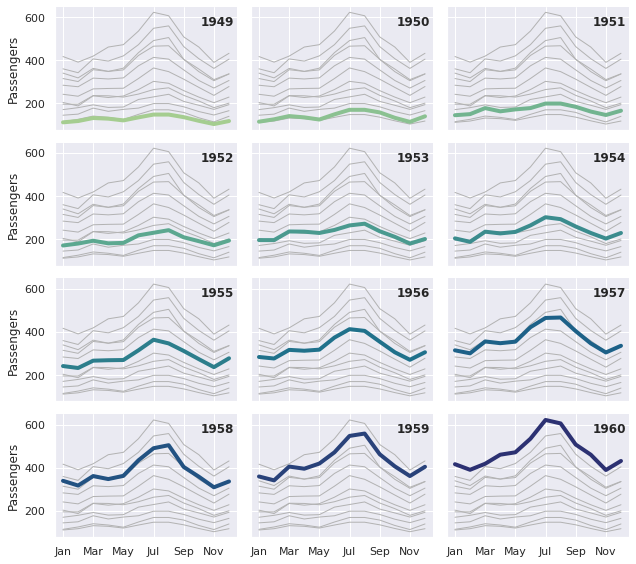

In [24]:
# https://seaborn.pydata.org/examples/timeseries_facets.html
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [25]:
# Install with:
# conda install -c plotly plotly=5.9.0
# or
# pip install plotly==5.9.0

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

# 4. Pandas

From Wikipedia, "`pandas` is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license. The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. Its name is a play on the phrase "Python data analysis" itself. Wes McKinney started building what would become pandas at AQR Capital while he was a researcher there from 2007 to 2010."

In [26]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [27]:
area_dict = {
    'California': 423967, 
    'Texas': 695662, 
    'New York': 141297,
    'Florida': 170312, 
    'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [28]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_table(url, sep='|', index_col='user_id')

In [29]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


# 5. StatsModels

"`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration."

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [32]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.90e-08
Time:                        21:56:22   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     8.222
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           0.000503
Time:                        21:56:23   Log-Likelihood:                -16.640
No. Observations:                 100   AIC:                             39.28
Df Residuals:                      97   BIC:                             47.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5992      0.071     22.600      0.000       1.459       1.740
x1            -0.0127      0.098     -0.130      0.897      -0.206       0.181
x2             0.4146      0.103      4.038      0.000       0.211       0.618
==============================================================================
Omnibus:                       15.867   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.952
Skew:                          -0.193   Prob(JB):                       0.0841
Kurtosis:                       1.980   Cond. No.                         4.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6. IPyWidgets

#### 6.1 Lorenz Attractor: Lorenz System of Differential Equations


In [34]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [35]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(tup, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = tup
        """Compute the time-derivative of a Lorentz system."""
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

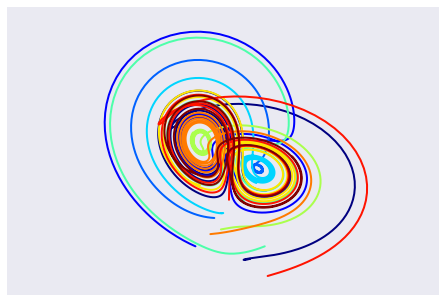

In [36]:
t, x_t = solve_lorenz(angle=0, N=10)

In [37]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

#### 6.2 Mean-Variance Portfolio Analysis

In [38]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt

def plot_portfolio(weight_1=.5, R0=4.0, R1=8.0, sd0=5.0, sd1=10.0, corr=0.0):
    
    #calculate portfolio properties
    expected_return = lambda a: a * R1 + (1-a) * R0
    add_sd = lambda a: np.sqrt((1-a)**2 * sd0**2 + a**2 * sd1**2 
                            + 2*a*(1-a)*corr*sd0 * sd1)
    
    #calculate frontier
    weight_1_range = np.linspace(-2.0, 2.0, 100)
    y = expected_return(weight_1_range)
    x = add_sd(weight_1_range)
    
    #Plot frontier and points
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot([sd0, sd1], [R0, R1], 'o')
    ax.axis([0, 15, -2, 10])
    ax.plot([add_sd(weight_1)], [expected_return(weight_1)], 'o')
    plt.xlabel('standard deviation')
    plt.ylabel('expected return')

In [39]:
interact(plot_portfolio, weight_1=(-1.0, 2.0, .001), corr=(-1.0, 1.0, .01))

interactive(children=(FloatSlider(value=0.5, description='weight_1', max=2.0, min=-1.0, step=0.001), FloatSlid…

<function __main__.plot_portfolio>

## 7. To do before next class

If you need help installing this software, please email me or ask for help in the discussion section on Canvas.

 - Python 3.9, Anaconda Distribution
   - For this class, please download the [Anaconda distribution of Python](https://www.anaconda.com/products/distribution). Be sure to download Python, version 3.9. 
   When you install Anaconda, be sure to install the full Anaconda distribution. 
   The MiniConda version is nice, but I only recommend it for advanced users.
 - The Visual Studio Code text editor
   - A good text editor is important for software development. Some of your classes will use a fully-fledged Integrated Development Environment (IDE) like PyCharm. For this review, I suggest Visual Studio Code. You can download it here: https://code.visualstudio.com/
 - Git (optional, but recommended)
   - Although there are many different Git clients and Git GUI's that you could use,
   I prefer that you install GitKraken. GitKraken bundles a Git Client with its GUI, so you don't need to install multiple pieces of software. [GitKraken can be downloaded here.](https://www.gitkraken.com/)
   - Some classes will use GitHub. GitHub is a website that allows you to store, interactic with, and share your Git repositories online. [Please register an account with GitHub](https://github.com/) if you don't already have one.